**1. 1er Modèle de détection**

**1.1.Données d'entrée** : Images extraites par RobotFlow à partir de la vidéo rentrée(2 frames par seconde). (Voir quelques images en exécutant le code ci-dessous).


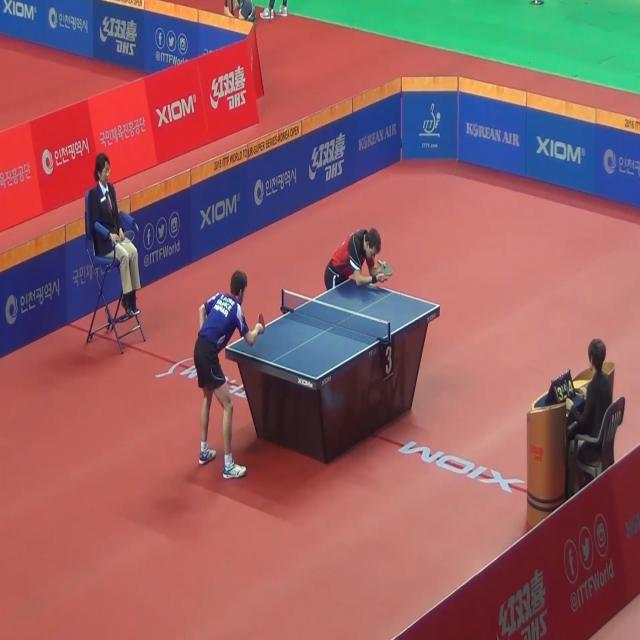

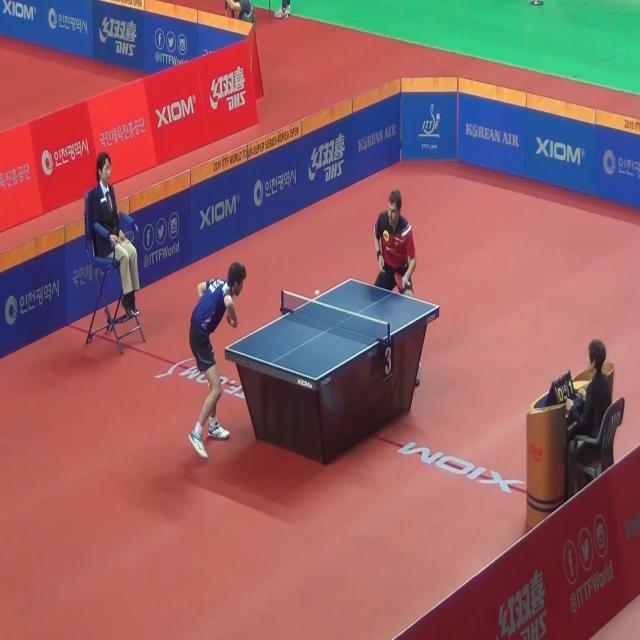

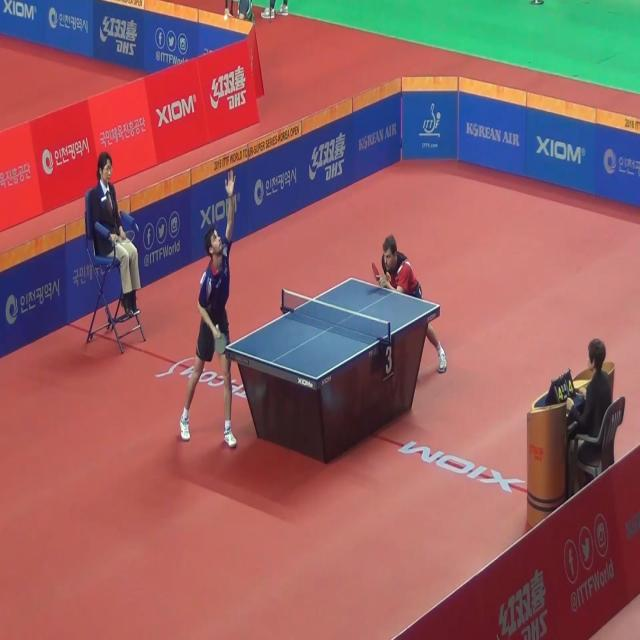

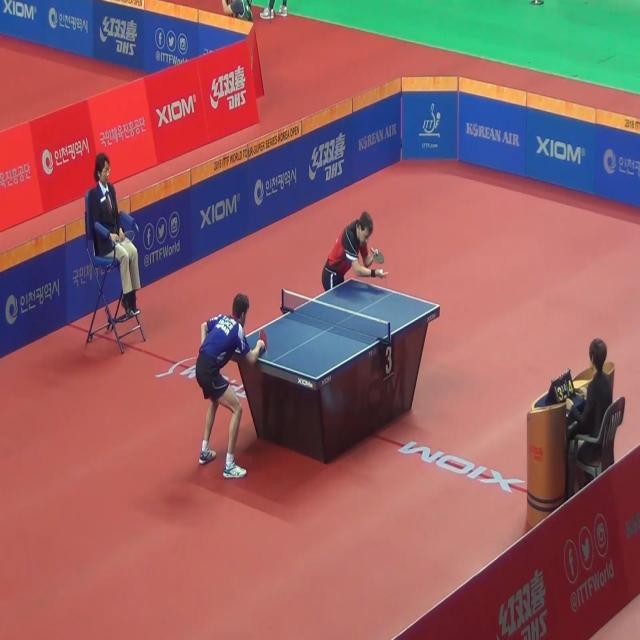

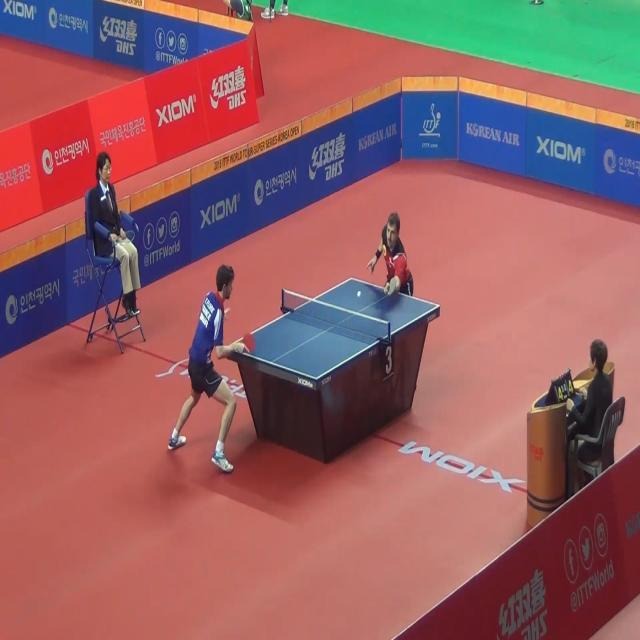

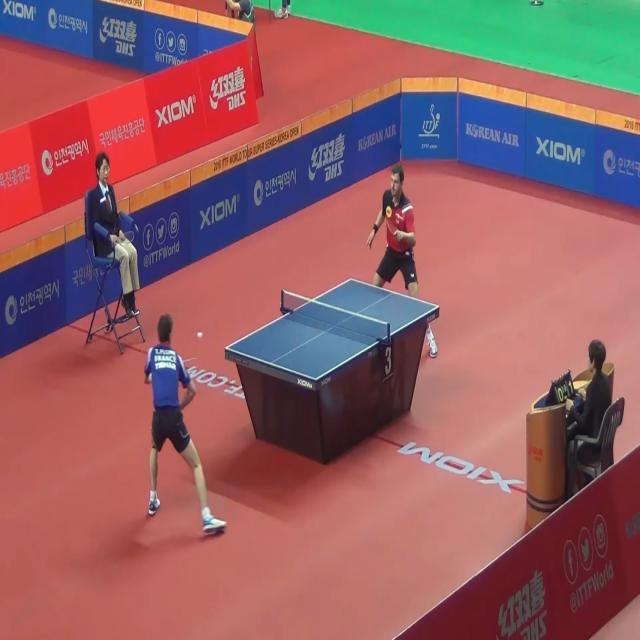

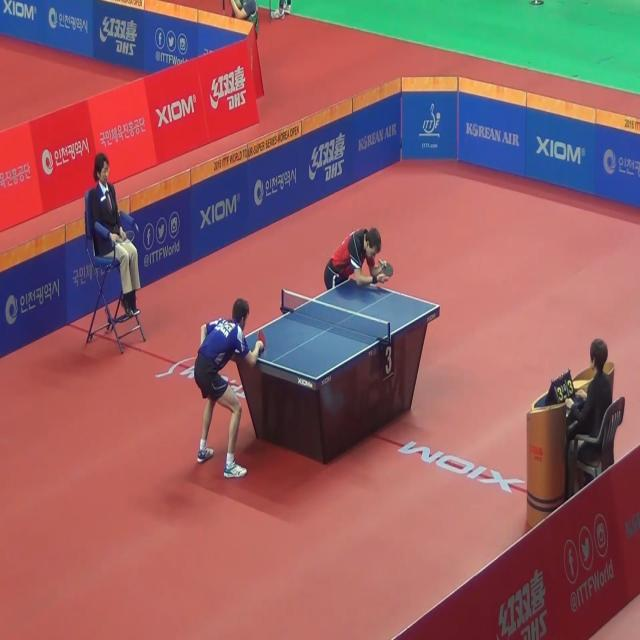

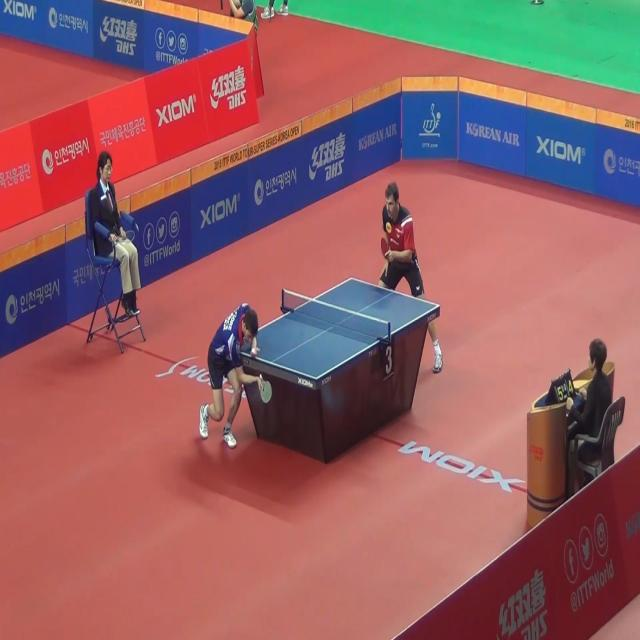

In [8]:
from IPython.display import Image
import os
path1 = 'Images_simples/'       

listing = os.listdir(path1)
for file in listing[:8]:
    #read the image
    im = Image(path1+ file,width=500, height=500)    
    #show image
    display(im)    

**1.2.Extraction des features** : Couleur, forme,nuances des couleurs...

**2. Pré-traitement** :

_Annotation des images par RobotFlow par RoboFlow.

_Réaliser une"data augmentation" de quelques images afin d'améliorer la dataset et l'entrainement.
Exemple: Faire la rotation des images, Jouer sur le contraste des couleurs...

_On pourrait meme dans un second temps; après avoir bien entrainé le modèle à connaitre la raquette; restreindre le milieu de la recherche de la raquette, en le liant à la position de la main du joueur(travail déjà réalisé par Aymeric).

(voir quelques exemples en exécutant les codes ci-dessous).

**Importation des bibliothèques nécessaires**


In [ ]:
import torch
from yolov5 import utils
import torch
import utils
from IPython import display
from IPython.display import clear_output
from pathlib import Path
import yaml
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob


%matplotlib inline
display = utils.notebook_init()

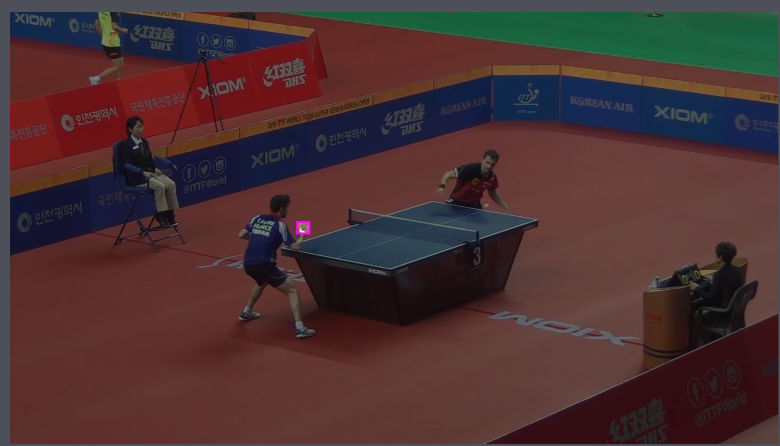

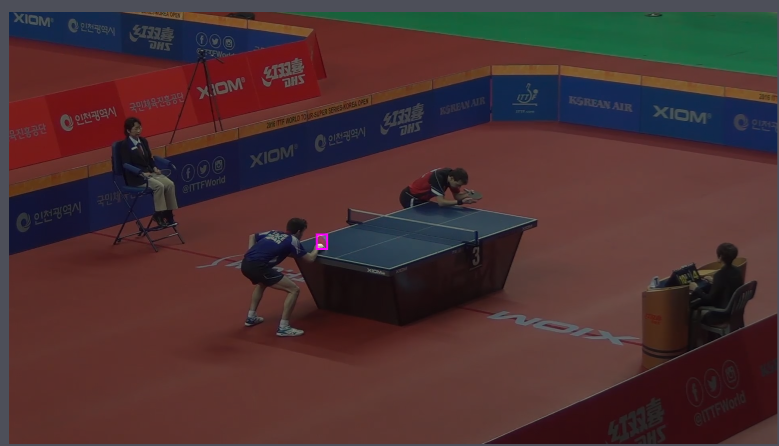

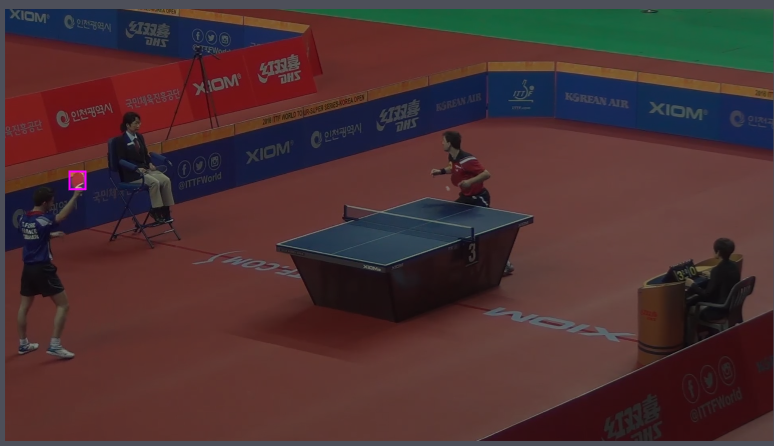

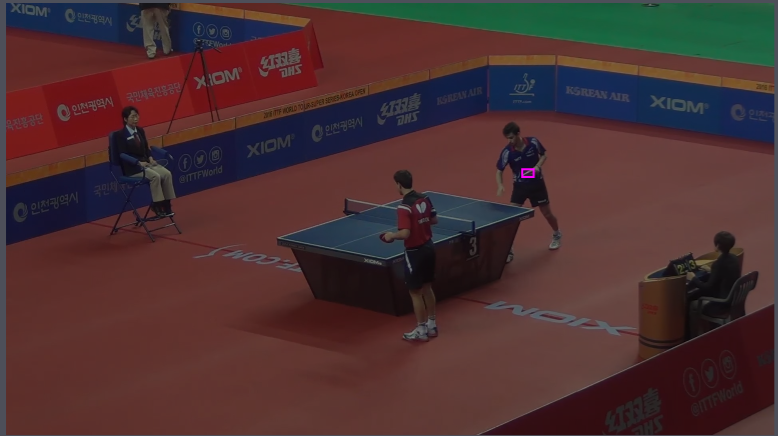

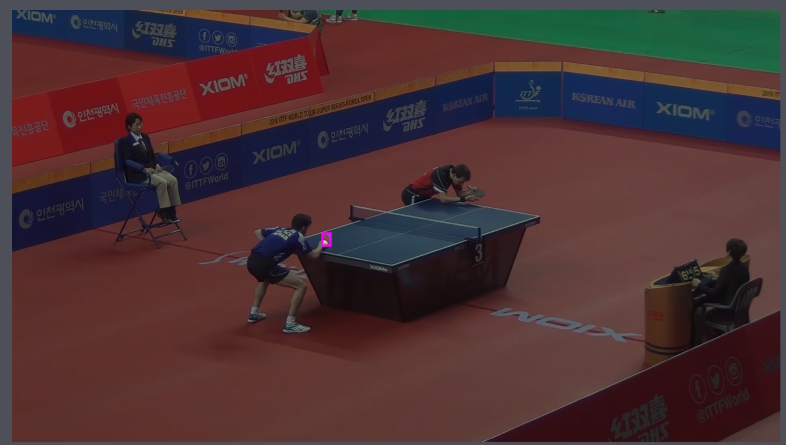

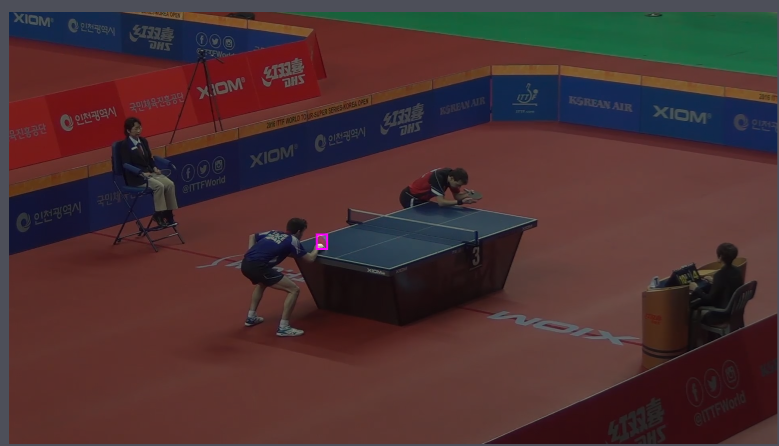

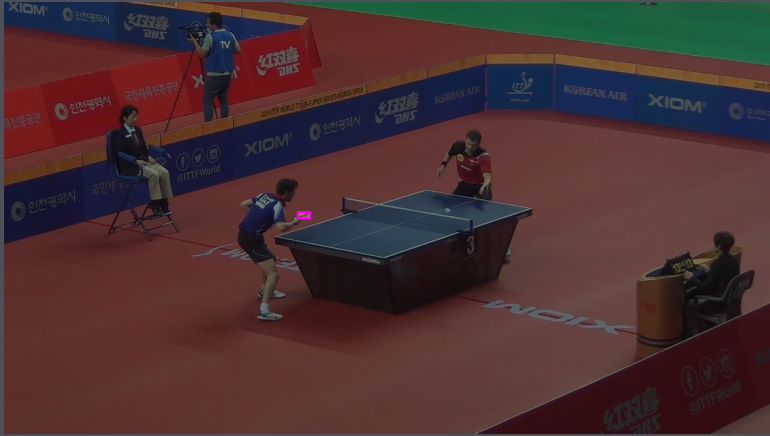

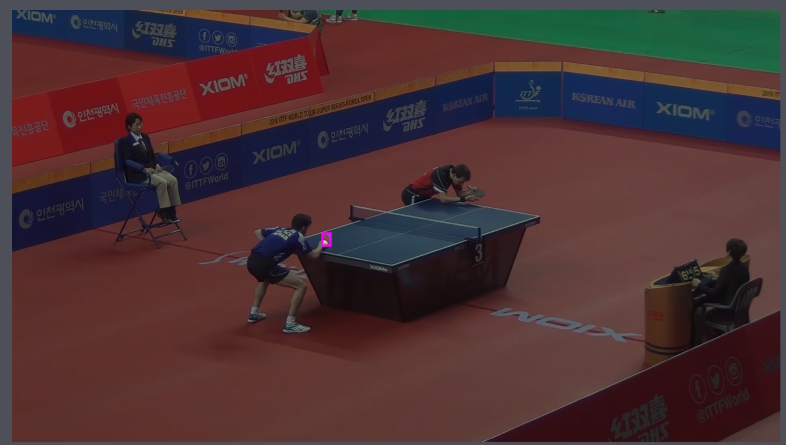

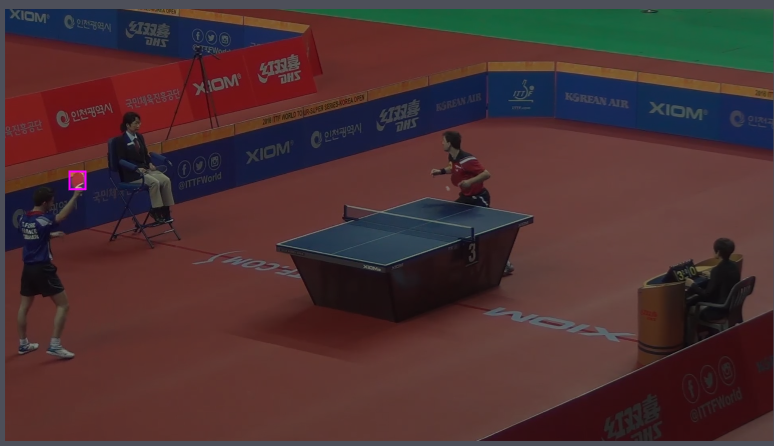

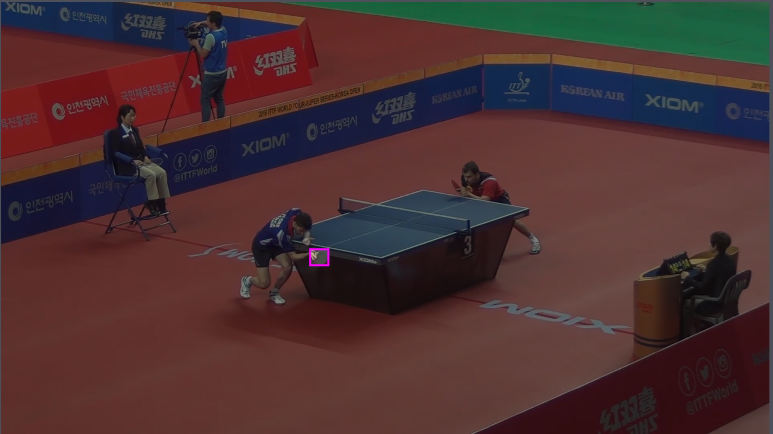

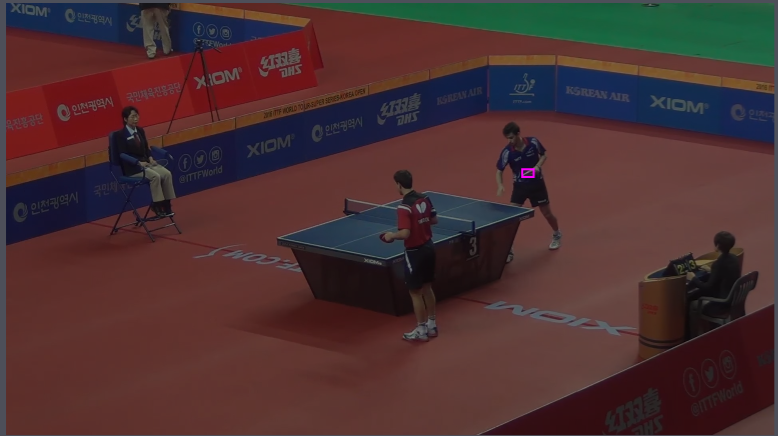

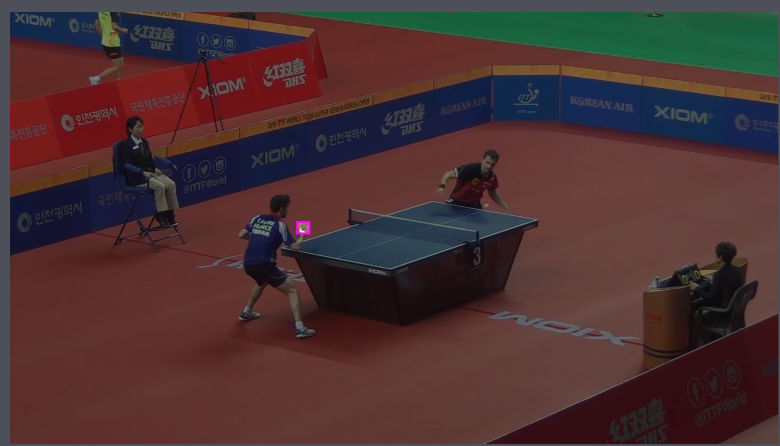

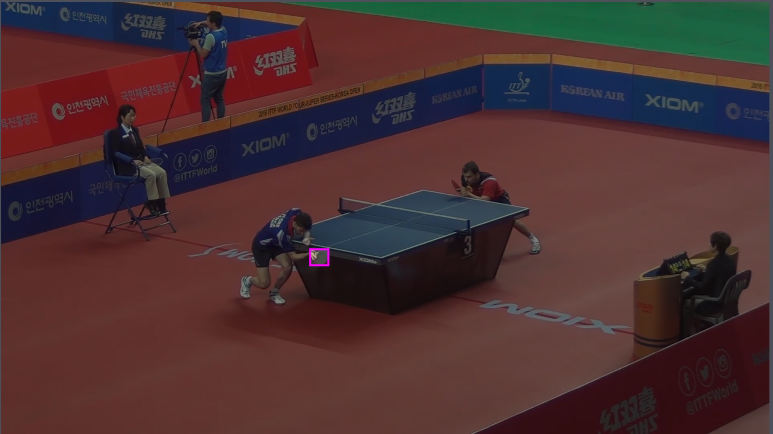

In [9]:
#Images annotées
from IPython.display import Image
import os
path2 = 'Images_annotées/'       

listing = os.listdir(path2)
for file in listing[:13]:
    #read the image
    im = Image(path2+ file,width=500, height=500)    
    #show image
    display(im)    

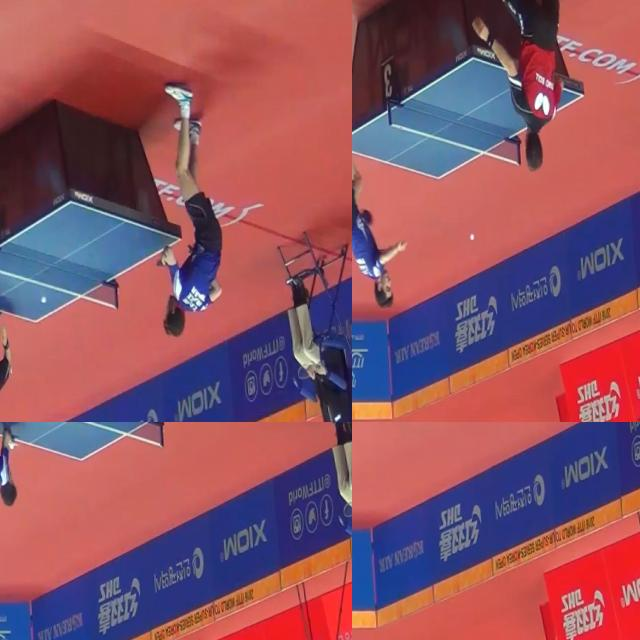

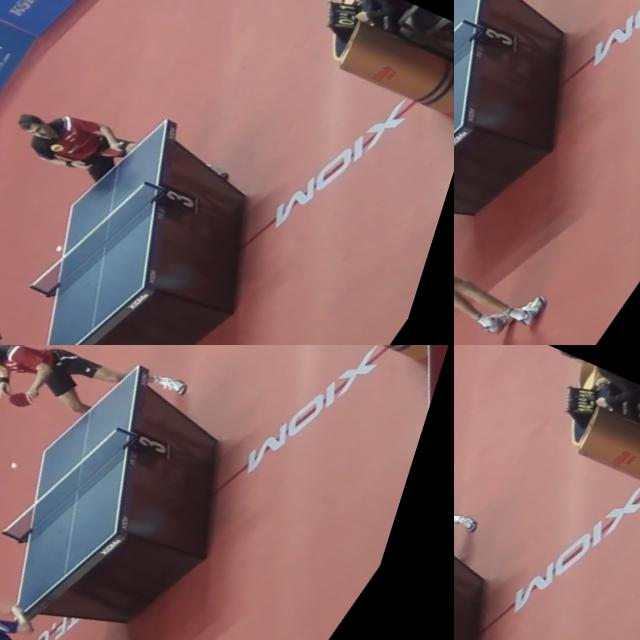

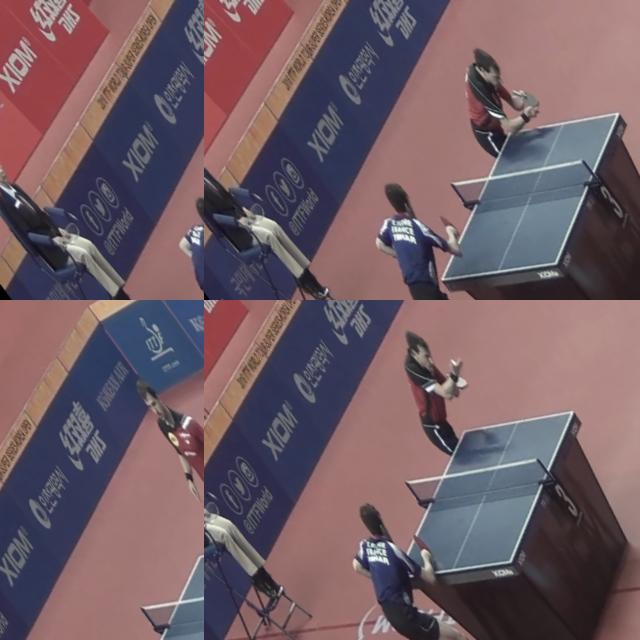

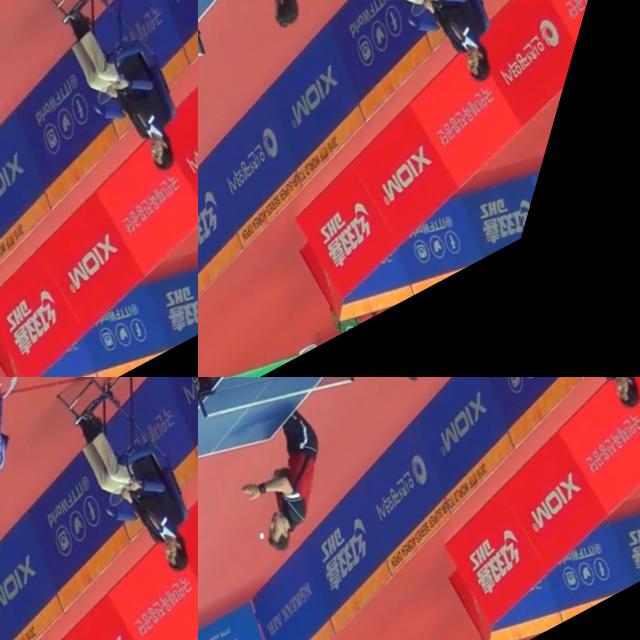

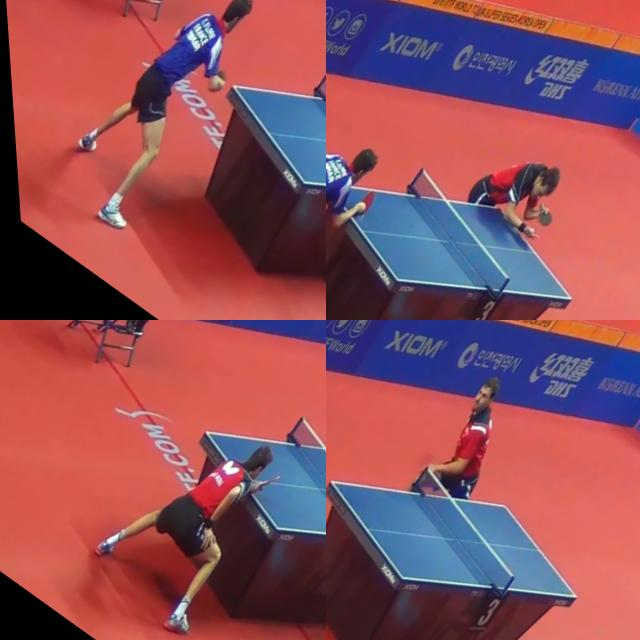

In [10]:
#Images avec des changements(rotations,changement de contraste...)
from IPython.display import Image
import os
path3 = 'Images_enrichies/'       

listing = os.listdir(path3)
for file in listing[:5]:
    #read the image
    im = Image(path3+ file,width=500, height=500)    
    #show image
    display(im)    

**2.Entrainement du modèle**

_Entrainement d'un modèle en se basant sur le modèle **Yolov5**.Il y a 281 layers (couches), 12322312 paramètres à déterminer ( weights) et 12322312 calcul de gradients.
On fait tourner le code sur la GPU pourqu'il soit plus rapide.

In [ ]:
!python train.py --batch 32 --epochs 150 --data 'data/raquette_data.yaml' --weights 'yolov5s6.pt' --project 'runs_raquette' --name 'feature_extraction' --cache --freeze 12


**3.Calcul des métriques**

Loss function, Precision , recall ( ou rappel), mAP ( mean average precision).

In [ ]:
display.Image(f"runs_raquette/feature_extraction/results.png")
# pour chaque epoch, on calcule la précision pour chaque epoch:
#precision=nombre de bonnes prédictions/nombre de prédictions faites.

**3.1 Courbe Précision**

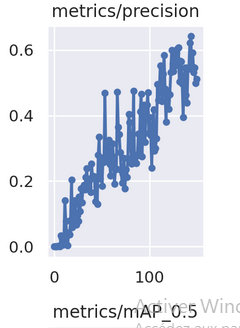

In [14]:
from IPython.display import Image
import os
path4 = 'Courbe_précision/'       

listing = os.listdir(path4)
for file in listing[:1]:
    #read the image
    im = Image(path4+ file,width=500, height=500)    
    #show image
    display(im)    

**4.Eviter le sur_apprentissage**

Ne pas s'influencer par les perturbations(sur les bords de la raquette par exemple, effets de luminosité...).

In [ ]:
!python train.py --hyp 'runs_raquette/feature_extraction/hyp.yaml' --batch 16 --epochs 100 --data 'data/raquette_data.yaml' --weights 'runs_raquette/feature_extraction/weights/best.pt' --project 'runs_raquette' --name 'fine-tuning' --cache

**5.Validation**

Optimisation des paramètres du réseau de neurones.

In [ ]:
!python val.py --weights 'runs_raquette/feature_extraction/weights/best.pt' --batch 64 --data 'data/raquette_data.yaml' --task test --project 'runs_raquette' --name 'validation_on_test_data' --augment


**6.Test**

Tester le modèle sur des images individuelles, ainsi que sur une vidéo.

In [ ]:
!python detect.py --weights 'runs_raquette/fine_tuning/weights/best.pt'  --conf 0.6 --source 'datasets/raquette_data/images/test' --project 'runs_raquette' --name 'detect_test' --augment --line=3
!python detect.py --weights 'runs_raquette/fine_tuning/weights/best.pt'  --conf 0.6 --source 'Video_à_tester.mp4' --project 'runs_raquette' --name 'detect_test' --augment --line=3